[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eeH4XWpk5cXgMVEYAhzoL9EJs-Lqr4IR?usp=sharing)

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib.pyplot as plt # Allow us to customimize scatterplots, lineplots & histograms
import pandas as pd # Allow us to work with CSV files.
import seaborn as sns # Import Seaborn visualization library
import numpy as np # Allow us to work with arrays
import random # Allow us to select a random item from a list and other sequence types
import warnings
warnings.filterwarnings('ignore') # Allow to disable Python warnings

In [ ]:
# Step 1: Loading "customers" csv file

# Loading the data
pd.set_option('precision', 2)
dataset_customers = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv') # Read a CSV file from internet (Github)
display(dataset_customers.style.set_caption("Customers.csv dataset\n") \
                               .set_properties(**{'text-align': 'center'}) \
                               .hide_index())   # Print customers.csv dataset

# Character "\" allows to concatenate different DataFrame.Style properties (set_caption, set_properties, hide_index)
# .set_caption                 This parameter adds a title to the dataframe
# **{'text-align': 'center'}   This parameter aligns the values of all the columns to the center  
# .hide_index()                This parameter hides the index column

Day,Millons of pounds in sales
1,2.00
2,8.00
3,20.00
4,13.00
5,5.00
6,9.00
7,10.00
8,8.00
9,22.00
10,10.00


# Instructions

* Create an array of samples of shape (n_bootstraps, sample_size). The sample should be taken from the input array x.    <br>Hint: Check the function random.choice() on Numpy
* Calculate the mean from each bootstrap (i.e., row) and store it. (done in section 3)
* Calculate and save the mean of the array (this is "data_mean" that is returned by the function)   (done in section 7). <br>
This should be an array of n_bootstraps values.
* Calculate the lower and upper bounds for a 95% CI (done in section 4) <br>
Hint: Check the percentile function on Numpy
* Return data_mean, and the lower and upper bounds of your interval (done at the end of the code)
* After checking the notes from the lecture, create here your own bootstrap function: 


In [ ]:
# Step 2: Creating a Bootstrap function.

def bootstrap_mean(sample,sample_size,n_iterations):

  # Section 1: Creating the first array for data collection
  bst_array = np.empty(shape=(n_iterations, sample_size))  # Create a new-empty array of dimension [n_iterations X sample_size](shape)
                                                           # n_iterations = Rows of the array
                                                           # sample_size  = Columns of the array

  # Section 2: Filling the array randomly
  for x in range(n_iterations):                                        # For-loop iterates over the range [n_iterations](Rows)
    for y in range(sample_size):                                       # For-loop iterates over the range [sample_size](Columns)
      bst_array[x][y] = random.choice(sample)                          # The empty array created will be populated with random numbers from the variable "sample"
  # Uncomment the following lines if you want to see each resample
  #print('''\nRessampling:
#%s''' %(bst_array)+'\n', end = '')  
  
  # Section 3: Calculating the mean of each resample
  bst_array_mean_all = []                                                       # Create a new-empty list to store all the means of each row
  for x in range(bst_array.shape[0]):                                           # For-loop iterates over the range [bst.shape[0]], which will give the number of rows  
    bst_array_mean_all.append(np.mean(bst_array[x]))                            # For each row in the range [bst.shape[0]], add the mean-value of each sample to the existing list "bst_array_mean_all" 
  # Uncomment the following lines if you want to see the mean of each resample
  #print('''\Mean of each sample:
#%s''' %(bst_array_mean_all)+'\n')
  bst_array_mean_all = np.sort(bst_array_mean_all)                            # Arrange the list in increasing order (from smallest to largest)
      
  # Section 4: Calculating the lower and upper bounds for a 95% CI
  p25 = np.percentile(bst_array_mean_all, 2.5)    # Calculate the 2.5th percentile
  p75 = np.percentile(bst_array_mean_all, 97.5)   # Calculate the 97.5th percentile
  
  # Section 5: Creating the second array for data presentation
  bst_array_last = np.where(bst_array_mean_all > p25, bst_array_mean_all, -1)   # Action: Replace all the elements of the array "bst_array_mean_all" with a -1, if they are lower than P25 value.
  bst_array_last = np.where(bst_array_mean_all < p75, bst_array_last, -1)       # Action: Replace all the elements of the array "bst_array_last" with a -1, if they are greater than P75 value.
  bst_array_last = np.sort(bst_array_last)                                      # Arrange the array in increasing order (from smallest to largest) 

  # Section 6: Retrieving lower and upper value
  i = 0                             # i is initially 0.
  while i > -1:                     # While-loop only iterates over the range "bst_array_last", if the value of i is greater than -1.   
    if bst_array_last[i] != -1:     # Condition: if element [i] is not equal to -1, then enter to the if-block.
      lower = bst_array_last[i]     # Retrieve the lower value of the function. (It will be the first element encountered different than -1) 
      break                         # Immediately terminates the while-loop entirely
    i += 1                          # Output: i = [i + 1] 
  upper = bst_array_last[-1]        # Retrieve the upper value of the function. (It will be the last element encountered different than -1)                   
       
  # Section 7: Calculating the mean of the means
  data_mean = 0                                     # data_mean variable is initially 0.
  count = 0                                         # count variable is initially 0.
  for idx,x in enumerate(bst_array_last):           # For-loop-enumerate iterates over indices (idx) and items (x) of a list containing all the means between the interval [2.5% ≤ Mean ≤ 97.5%]
    if bst_array_last[idx] != -1:                   # Condition: if element[idx] is not equal to -1, then enter to the if-block.
      count += 1                                    # Output: count = [count + 1] 
      data_mean = data_mean + bst_array_last[idx]   # At this point, this variable stores the sum of the mean values that are different than -1

  data_mean = data_mean/count       # Calculate the mean of the means
  return data_mean,lower,upper

print('Bootstrap function has been created succesfully')

# np.empty()       This function is used to create a new array of given shape and type, without initializing entries.
# Shape            This attribute for numpy arrays returns the dimensions of the array. 
# np.mean          This function is used to calculate the mean value
# np.percentile()  This function is used to calculate the declared percentile value
# np.where()       This function is used to replace elements with an arbitrary value only when the condition is satisfied or only when the condition is not satisfied.

Bootstrap function has been created succesfully


In [ ]:
# Step 3: Calling the Bootstrap function

np.set_printoptions(threshold=np.inf, precision=2, suppress=True, linewidth=180) # Print all the values of an array as a pretty table (all values in one row)
data = dataset_customers.values.T[1]   # Retrieve all values of the column "Millons of pounds in sales Salary"
print('''\ncustomers.csv sample:
%s''' %(data)+'\n') # Output: All values of the column "Millons of pounds in sales Salary"

boots = []                                           # Create a new-empty list to store the mean, lower bound and upper bound obtained in every bootstrap's run
for i in range(100, 50000, 1000):                    # For-loop iterates over an increasing sequence (Start at 100, finish at 50000 and counting up in steps of 1000)
  boot = bootstrap_mean(data, data.shape[0], i)      # The empty array created will be populated with the mean value, lower value and higher value obtained after performing the function bootstrap_mean
  boots.append([i, boot[0], "mean"])                 # For each row in the range [100 to 50000], add the obtained mean value to the list "boots". (It occurs after perfoming the bootstrap_mean function)
  boots.append([i, boot[1], "lower"])                # For each row in the range [100 to 50000], add the obtained lower value to the list "boots". (It occurs after perfoming the bootstrap_mean function)
  boots.append([i, boot[2], "upper"])                # For each row in the range [100 to 50000], add the obtained higher value to the list "boots". (It occurs after perfoming the bootstrap_mean function) 

print('Bootstrap function has terminated with no problems\n')

pd.set_option("display.max_rows", None, "display.max_columns", None) # Print the entire Pandas dataframe (All the rows)
df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
count = df_boot.groupby('Value').count()  # Count all occurrences for each different group existing in column 'Value' (mean, lower & upper)
print('''Total number of iterations performed by the Bootstrap_mean function:
%s'''%(np.unique(count))+'\n') # Output: Total number of iterations performed in Bootstrap_mean function.

display(df_boot.style.set_caption("Dataset after bootstrap's runs") \
                               .set_properties(**{'text-align': 'left'}) \
                               .hide_index()) # Print the dataset obtained after perfoming bootstrap_mean function

# df.values()     This function converts all the values of a DataFrame into an array without any index or columns names. 
# df.values.T     The T property is used to transpose index and columns.
# .shape          This function gets the number of rows and columns of the array. 
# Groupby()       This function is used to split the data into groups based on some criteria
# unique()        This function is used to find the unique elements of an array


customers.csv sample:
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]

Bootstrap function has terminated with no problems

Total number of iterations performed by the Bootstrap_mean function:
[50]



Bootstrap Iterations,Mean,Value
100,9.20,mean
100,6.79,lower
100,11.64,upper
1100,9.20,mean
1100,6.43,lower
1100,12.29,upper
2100,9.13,mean
2100,6.50,lower
2100,12.29,upper
3100,9.17,mean


Text(0.5, 1.0, '\nLinePlot created with 95% CI\n')

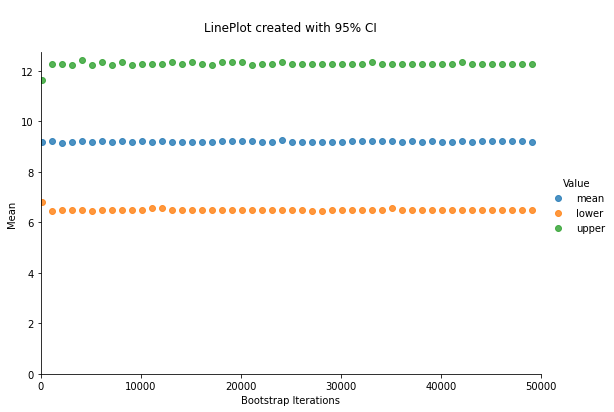

In [ ]:
# Step 4: plotting the bootstrap function

sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value", height=5, aspect=1.5) # Creates a lineplot with the specified parameters.
sns_plot.axes[0, 0].set_xlim(0, 50000)  # This X-Axis property indicates: "Start at 0, finish at 50000"
sns_plot.axes[0, 0].set_ylim(0,)        # This Y-Axis property indicates: "Start at 0, finish at largest value"
plt.title("\nLinePlot created with 95% CI\n")  # Add a title to the scatterplot

# sns.implot         This function represents the lineplot, which is one of the most basic plots. It shows a line on a 2 dimensional plane
# fit_reg = False    If false, this parameter does not plot a regression model relating the x and y variables.
# Hue                In seaborn, this parameter determines which column in the dataframe should be used for colour encoding.
# height             This parameter is the height of each facet (in inches). [Height = 5] is a good value to increase the size of the lineplot. 
# aspect             This parameter is the aspect ratio of each facet. 
#                    The width of each facet is calculated by doing [aspect * height]
# data               This parameter is equal to the dataframe.


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
# Step 2: Creating a Bootstrap function with CI parameter.

def bootstrap_mean_ci(sample, sample_size, n_iterations, ci):
    
  # Section 1: Creating the first array for data collection
  bst_array_1 = np.empty(shape=(n_iterations, sample_size))  # Create a new-empty array of dimension [n_iterations X sample_size](shape)
                                                             # n_iterations = Rows of the array
                                                             # sample_size  = Columns of the array
        
  # Section 2: Filling the array randomly
  for x in range(n_iterations):                              # For-loop iterates over the range [n_iterations](Rows)
    for y in range(sample_size):                             # For-loop iterates over the range [sample_size](Columns)
      bst_array_1[x][y] = random.choice(sample)              # The empty array created will be populated with random numbers from the variable "sample"

 # Section 3: Calculating the mean of each resample
  bst_array_mean_all_1 = []                                        # Create a new-empty list to store all the means of each row
  for x in range(bst_array_1.shape[0]):                            # For-loop iterates over the range [bst.shape_1[0]], which will give the number of rows  
    bst_array_mean_all_1.append(np.mean(bst_array_1[x]))           # For each row in the range [bst.shape_1[0]], add the mean-value of each sample to the existing list "bst_array_mean_all_1" 

  bst_array_mean_all_1 = np.sort(bst_array_mean_all_1)             # Arrange the list in increasing order (from smallest to largest)

  # Section 4: Calculating the lower and upper bounds for a n% CI
  lower_1 = np.percentile(bst_array_mean_all_1, ((100-ci)/2))         # Calculate the lower CI percentile
  upper_1 = np.percentile(bst_array_mean_all_1, (100-((100-ci)/2)))   # Calculate the Higher CI percentile

  # Section 5: Creating the second array for data presentation
  bst_array_last_1 = np.where(bst_array_mean_all_1 > lower_1, bst_array_mean_all_1, -1)   # Action: Replace all the elements of the array "bst_array_mean_all_1" with a -1, if they are lower than lower_1 value.
  bst_array_last_1 = np.where(bst_array_mean_all_1 < upper_1, bst_array_last_1, -1)       # Action: Replace all the elements of the array "bst_array_last_1" with a -1, if they are greater than upper_1 value.
  bst_array_last_1 = np.sort(bst_array_last_1)                                            # Arrange the array in increasing order (from smallest to largest) 

  # Section 6: Retrieving lower and upper value
  i = 0                               # i is initially 0.
  while i > -1:                       # While-loop only iterates over the range "bst_array_last_1", if the value of i is greater than -1.   
    if bst_array_last_1[i] != -1:     # Condition: if element [i] is not equal to -1, then enter to the if-block.
      lower = bst_array_last_1[i]     # Retrieve the lower value of the function. (It will be the first element encountered different than -1) 
      break                           # Immediately terminates the while-loop entirely
    i += 1                            # Output: i = [i + 1] 
  upper = bst_array_last_1[-1]        # Retrieve the upper value of the function. (It will be the last element encountered different than -1)                   

  # Section 7: Calculating the mean of the means
  data_mean = 0                                         # data_mean variable is initially 0.
  count = 0                                             # count variable is initially 0.
  for idx,x in enumerate(bst_array_last_1):             # For-loop-enumerate iterates over indices (idx) and items (x) of a list containing all the means between the CI interval given
    if bst_array_last_1[idx] != -1:                     # Condition: if element[idx] is not equal to -1, then enter to the if-block.
      count += 1                                        # Output: count = [count + 1] 
      data_mean = data_mean + bst_array_last_1[idx]     # At this point, this variable stores the sum of the mean values that are different than -1

  data_mean = data_mean/count       # Calculate the mean of the means

  return data_mean,lower,upper

print('Bootstrap function with CI has been created succesfully')

# np.empty()       This function is used to create a new array of given shape and type, without initializing entries.
# Shape            This attribute for numpy arrays returns the dimensions of the array. 
# np.mean          This function is used to calculate the mean value
# np.percentile()  This function is used to calculate the declared percentile value
# np.where()       This function is used to replace elements with an arbitrary value only when the condition is satisfied or only when the condition is not satisfied.

Bootstrap function with CI has been created succesfully


In [ ]:
# Step 3: Calling the Bootstrap function with CI parameter

np.set_printoptions(threshold=np.inf, precision=2, suppress=True, linewidth=180) # Print all the values of an array as a pretty table (all values in one row)
data_1 = dataset_customers.values.T[1]   # Retrieve all values of the column "Millons of pounds in sales Salary"
print('''\ncustomers.csv sample:
%s''' %(data_1)+'\n') # Output: All values of the column "Millons of pounds in sales Salary"

ci = 80 # This is the desired CI value.

boots_1 = []                                                           # Create a new-empty list to store the mean, lower bound and upper bound obtained in every bootstrap's run
for i in range(100, 50000, 1000):                                      # For-loop iterates over an increasing sequence (Start at 100, finish at 50000 and counting up in steps of 1000)
  boot_1 = bootstrap_mean_ci(data_1, data_1.shape[0], i, ci)           # The empty array created will be populated with the mean value, lower value and higher value obtained after performing the function bootstrap_mean_ci
  boots_1.append([i, boot_1[0], "mean"])                               # For each row in the range [100 to 50000], add the obtained mean value to the list "boots_1". (It occurs after perfoming the bootstrap_mean_ci function)
  boots_1.append([i, boot_1[1], "lower"])                              # For each row in the range [100 to 50000], add the obtained lower value to the list "boots_1". (It occurs after perfoming the bootstrap_mean_ci function)
  boots_1.append([i, boot_1[2], "upper"])                              # For each row in the range [100 to 50000], add the obtained higher value to the list "boots_1". (It occurs after perfoming the bootstrap_mean_ci function) 

print('Bootstrap function with CI has terminated with no problems\n')

pd.set_option("display.max_rows", None, "display.max_columns", None) # Print the entire Pandas dataframe (All the rows)
df_boot_1 = pd.DataFrame(boots_1, columns=['Bootstrap Iterations', 'Mean', "Value"])
count_1 = df_boot_1.groupby('Value').count()  # Count all occurrences for each different group existing in column 'Value' (mean, lower & upper)
print('''Total number of iterations performed by the Bootstrap_mean_ci function:
%s'''%(np.unique(count_1))+'\n') # Output: Total number of iterations performed in Bootstrap_mean_ci function.

display(df_boot_1.style.set_caption("Dataset after bootstrap's runs") \
                               .set_properties(**{'text-align': 'left'}) \
                               .hide_index()) # Print the dataset obtained after perfoming bootstrap_mean_ci function

# df.values()     This function converts all the values of a dataFrame into an array without any index or columns names. 
# df.values.T     The T property is used to transpose index and columns.
# .shape          This function gets the number of rows and columns of the array. 
# Groupby()       This function is used to split the data into groups based on some criteria
# unique()        This function is used to find the unique elements of an array


customers.csv sample:
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]

Bootstrap function with CI has terminated with no problems

Total number of iterations performed by the Bootstrap_mean_ci function:
[50]



Bootstrap Iterations,Mean,Value
100,9.16,mean
100,7.14,lower
100,11.71,upper
1100,9.24,mean
1100,7.36,lower
1100,11.21,upper
2100,9.26,mean
2100,7.50,lower
2100,11.14,upper
3100,9.18,mean


Text(0.5, 1.0, '\nLinePlot created with 80% CI')

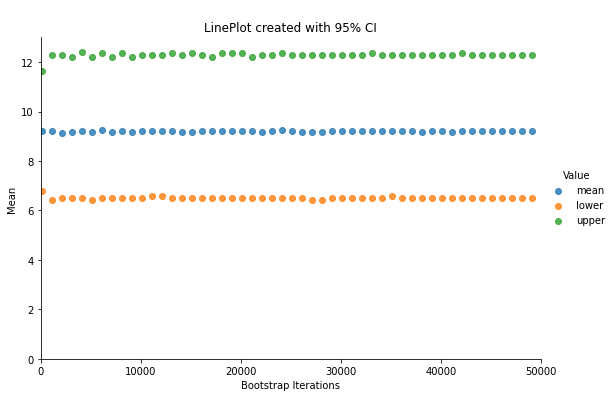

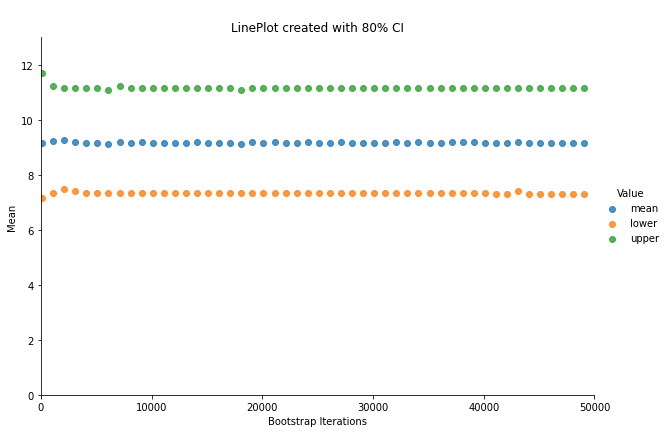

In [ ]:
# Step 4: plotting the 2 bootstrap functions (bootstrap_mean & bootstrap_mean_ci)

# LinePlot with 95% CI resulted from applying bootstrap_mean function

print()
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value", height=5, aspect=1.5) # Creates a lineplot with the specified parameters.
sns_plot.axes[0, 0].set_xlim(0, 50000)    # This X-Axis property indicates: "Start at 0, finish at 50000"
sns_plot.axes[0, 0].set_ylim(0,13)        # This Y-Axis property indicates: "Start at 0, finish at 13"
plt.title("\nLinePlot created with 95% CI")  # Add a title to the lineplot

# LinePlot with n% CI resulted from applying bootstrap_mean_ci function

sns_plot_1 = sns.lmplot(df_boot_1.columns[0], df_boot_1.columns[1], data=df_boot_1, fit_reg=False, hue="Value", height=5.5, aspect=1.5) # Creates a lineplot with the specified parameters.
sns_plot_1.axes[0, 0].set_xlim(0, 50000)    # This X-Axis property indicates: "Start at 0, finish at 50000"
sns_plot_1.axes[0, 0].set_ylim(0,13)        # This Y-Axis property indicates: "Start at 0, finish at 13"
plt.title("\nLinePlot created with %s CI" %(str(ci)+'%')) # Add a title to the lineplot

# sns.implot         This function represents the lineplot, which is one of the most basic plots. It shows a line on a 2 dimensional plane
# fit_reg = False    If false, this parameter does not plot a regression model relating the x and y variables.
# Hue                In seaborn, this parameter determines which column in the dataframe should be used for colour encoding.
# height             This parameter is the height of each facet (in inches). [Height = 5] is a good value to increase the size of the lineplot. 
# aspect             This parameter is the aspect ratio of each facet. 
#                    The width of each facet is calculated by doing [aspect * height]
# data               This parameter is equal to the dataFrame.

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.

* To load the dataset, go to: https://neptune.ai/blog/google-colab-dealing-with-files <br> 
  (check section "Load individual files directly from GitHub")
* Note that the current and new fleets are in different columns and have different lenghts, so bear this in mind when you are plotting.
* You can create separate scatterplots for the two fleets, as you would with the histograms, or plot them both in one plot (but not against the other). 
* Note that you can add more cells as needed to organise your code and your plots

In [ ]:
# Step 1: Loading "Vehicles" csv file (Part 1)

# Loading the "Current fleet" dataset
print('\n"Current fleet" dataset:\n')
dataset_vcurrent = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv', usecols=["Current fleet"]) # Read a CSV file from internet (Github)
dataset_vcurrent.index +=1 # Shift the index by 1 (not 0)
dataset_vcurrent.reset_index(inplace=True) # Reset the index of the "dataset_vcurrent"
display(dataset_vcurrent.style.set_properties(**{'text-align': 'center'}) \
                              .hide_index()) # Output: "Current fleet" dataset

# Character "\" allows to concatenate different DataFrame.Style properties (set_properties, hide_index)
# **{'text-align': 'center'}   This parameter aligns the values of all columns to the center
# .hide_index()                This parameter hides the index column
# usecols=['']                 This parameter is used to provide a filter before reading the whole dataFrame into memory. In other words, it will read only the column specified from a csv or excel file.
# inplace = False              This parameter is used to return a new copy of the object with the operation performed.
# inplace = True               This parameter is used to make changes in the original dataframe itself.
# dropna()                     This parameter is used to drop rows that contains missing values (NaN)


"Current fleet" dataset:



index,Current fleet
1,18
2,15
3,18
4,16
5,17
6,15
7,14
8,14
9,14
10,15


In [ ]:
# Step 1: Loading "Vehicles" csv file (Part 2)

# Loading the "New Fleet" dataset
print('\n"New Fleet" dataset:\n')
dataset_vnew = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv', usecols=["New Fleet"]) # Read a CSV file from internet (Github)
dataset_vnew_dropna = dataset_vnew.dropna(inplace = False) # Drop rows that contains missing values (Nan)
dataset_vnew_dropna.index +=1 # Shift the index by 1 (not 0)
dataset_vnew_dropna.reset_index(inplace=True) # Reset the index of the dataframe "dataset_vnew_dropna"

display(dataset_vnew_dropna.style.set_properties(**{'text-align': 'center'}) \
                                .hide_index())  # Output: "New Fleet" dataset

# Character "\" allows to concatenate different DataFrame.Style properties (set_properties, hide_index)
# **{'text-align': 'center'}   This parameter aligns the values of all columns to the center
# .hide_index()                This parameter hides the index column
# usecols=['']                 This parameter is used to provide a filter before reading the whole dataFrame into memory. In other words, it will read only the column specified from a csv or excel file.
# inplace = False              This parameter is used to return a new copy of the object with the operation performed.
# inplace = True               This parameter is used to make changes in the original data frame itself.
# dropna()                     This parameter is used to drop rows that contains missing values (NaN)


"New Fleet" dataset:



index,New Fleet
1,24.00
2,27.00
3,27.00
4,25.00
5,31.00
6,35.00
7,24.00
8,19.00
9,28.00
10,23.00


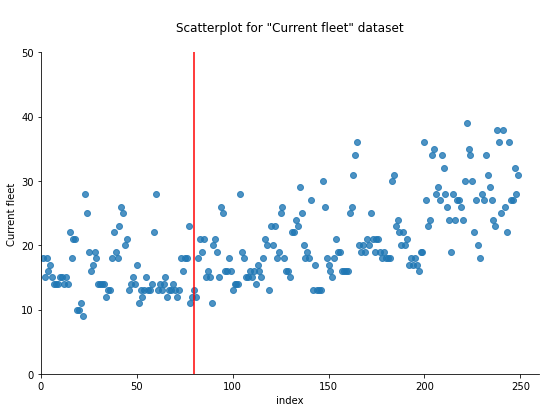

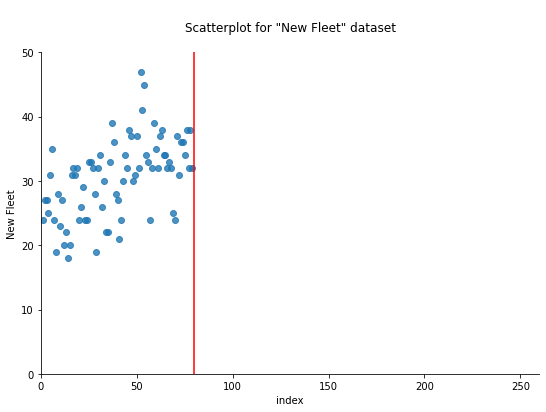

In [ ]:
# Step 2: plotting the scatterplots for "Current fleet" dataset and "New Fleet" dataset

# Scatterplot for "Current fleet" dataset
scatterplot1 = sns.lmplot(dataset_vcurrent.columns[0], dataset_vcurrent.columns[1], data = dataset_vcurrent, fit_reg=False, height=5, aspect=1.5) # Creates a Scatterplot with the specified parameters.
scatterplot1.axes[0, 0].set_xlim(0,260)       # This X-Axis property indicates: "Start at 0, finish at 260"
scatterplot1.axes[0, 0].set_ylim(0,50)        # This Y-Axis property indicates: "Start at 0, finish at 50"
plt.title('\nScatterplot for "Current fleet" dataset\n')  # Add a title to the scatterplot
plt.axvline(80, 0, 40, color='r') # Draw a vertical line with particular specifications: (In X-Axis: start at value: 80. In Y-Axis: start at value 0 and finish at the largest value)

# Scatterplot for "New Fleet" dataset
scatterplot2 = sns.lmplot(dataset_vnew_dropna.columns[0], dataset_vnew_dropna.columns[1], data = dataset_vnew_dropna, fit_reg=False, height=5, aspect=1.5) # Creates a Scatterplot with the specified parameters.
scatterplot2.axes[0, 0].set_xlim(0,260)    # This X-Axis property indicates: "Start at 0, finish at 260"
scatterplot2.axes[0, 0].set_ylim(0,50)        # This Y-Axis property indicates: "Start at 0, finish at 50"
plt.title('\nScatterplot for "New Fleet" dataset\n')  # Add a title to the scatterplot
plt.axvline(80, 0, 40, color='r') # Draw a vertical line with particular specifications: (In X-Axis: start at value: 80. In Y-Axis: start at value 0 and finish at the largest value)

# sns.implot         This function represents the lineplot, which is one of the most basic plots. It shows a line on a 2 dimensional plane
# fit_reg = False    If false, this parameter does not plot a regression model relating the x and y variables.
# height             This parameter is the height of each facet (in inches). [Height = 5] is a good value to increase the size of the lineplot. 
# aspect             This parameter is the aspect ratio of each facet. 
#                    The width of each facet is calculated by doing [aspect * height]
# data               This parameter is equal to the dataFrame.


Rugplot points of "Current fleet" dataset:
29: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 38 39]


Rugplot points of "New Fleet" dataset:
25: [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 41. 45. 47.]



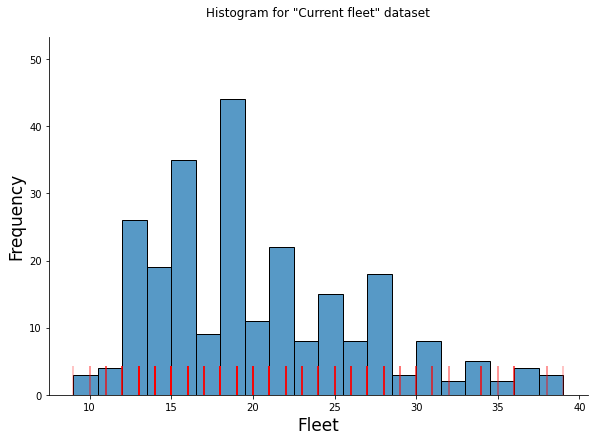

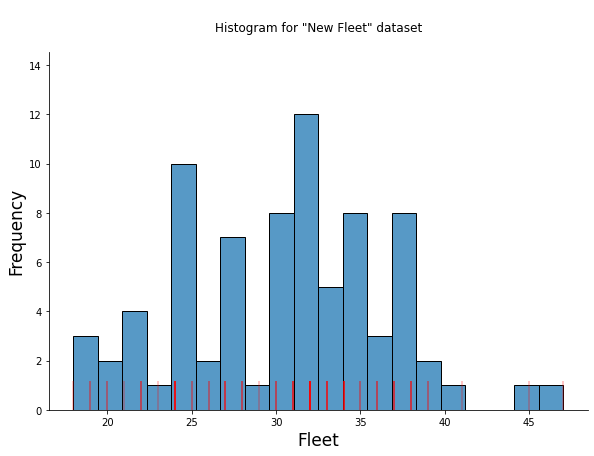

In [ ]:
# Step 2: plotting the histograms for "Current fleet" dataset and "New Fleet" dataset

# Histogram for "Current fleet" dataset
current_hist = dataset_vcurrent[dataset_vcurrent.columns[1]].values  # Retrieve all values of the column "Current fleet"
hist_current = sns.displot(current_hist, bins = 20, kde = False, rug = True, rug_kws={"color": "r", "alpha":0.3, "linewidth": 1.5, "height":0.08}, height=5.5, aspect=1.5)  # Creates a histogram with the specified parameters.
plt.xlabel("Fleet", fontsize=17)      # Add and customize X-Axis label
plt.ylabel("Frequency", fontsize=17)  # Add and customize Y-Axis label
plt.title('Histogram for "Current fleet" dataset\n')  # Add a title to the histogram

print('''\nRugplot points of "Current fleet" dataset:
%s: %s''' %(len(np.unique(current_hist)), np.unique(current_hist))+'\n') # Output: All unique values in the "Current fleet" dataset

# Histogram for "New fleet" dataset
new_hist = dataset_vnew_dropna[dataset_vnew_dropna.columns[1]].values  # Retrieve all values of the column "New Fleet"
hist_new = sns.displot(new_hist, bins = 20, kde = False, rug = True, rug_kws={"color": "r", "alpha":0.3, "linewidth": 1.5, "height":0.08}, height=5.5, aspect=1.5)  # Creates a histogram with the specified parameters.
plt.xlabel("Fleet", fontsize=17)      # Add and customize X-Axis label
plt.ylabel("Frequency", fontsize=17)  # Add and customize Y-Axis label
plt.title('\nHistogram for "New Fleet" dataset\n')  # Add a title to the Histogram

print('''\nRugplot points of "New Fleet" dataset:
%s: %s''' %(len(np.unique(new_hist)), np.unique(new_hist))+'\n') # Output: All unique values in the "New Fleet" dataset

# df.values()     This function converts all values of a dataFrame into an array without any index or columns names. 
# sns.displot     This function represents the histogram, which combines the matplotlib hist function with the seaborn kdeplot() functions.
# height          This parameter is the height of each facet (in inches). [Height = 5] is a good value to increase the size of the lineplot. 
# aspect          This parameter is the aspect ratio of each facet.
#                 The width of each facet is calculated by doing [aspect * height]
# bins            This parameter is used to specify the number of bins in the histogram. 
# rug = True      This parameter is used to draw a rugplot on the support axis.
# kde = False     This parameter is used to NOT plot a Gaussian-kernel density estimate.
# rug_kws={}      This module changes the parameters of rugplot lines. (Either the colour, linewidth or height)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# Step 1: Calculating the mean of both samples.

# Mean value of the "Current fleet" dataset
print('''\n"Current fleet" sample:
%s''' %(current_hist)+'\n') # Output: All values of the dataset "Current fleet"
print('''Mean value of the "Current fleet" sample (x̄):
%s''' %(np.mean(current_hist))+'\n') # Output: Mean value of the "Current fleet" dataset

# Mean value of the "New Fleet" dataset
print('''\n"New Fleet" sample:
%s''' %(new_hist)+'\n') # Output: All values of the dataset "New fleet"
print('''Mean value of the "New Fleet" sample (x̄):
%s''' %(np.mean(new_hist))+'\n') # Output: Mean value of the "New fleet" dataset

# np.mean          This function is used to calculate the mean value


"Current fleet" sample:
[18 15 18 16 17 15 14 14 14 15 15 14 15 14 22 18 21 21 10 10 11  9 28 25 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19 18 23 26 25 20 21 13 14 15 14 17 11 13 12 13 15 13 13 14 22
 28 13 14 13 14 15 12 13 13 14 13 12 13 18 16 18 18 23 11 12 13 12 18 21 19 21 15 16 15 11 20 21 19 15 26 25 16 16 18 16 13 14 14 14 28 19 18 15 15 16 15 16 14 17 16 15 18 21 20
 13 23 20 23 18 19 25 26 18 16 16 15 22 22 24 23 29 25 20 18 19 18 27 13 17 13 13 13 30 26 18 17 16 15 18 21 19 19 16 16 16 16 25 26 31 34 36 20 19 20 19 21 20 25 21 19 21 21 19
 18 19 18 18 18 30 31 23 24 22 20 22 20 21 17 18 17 18 17 16 19 19 36 27 23 24 34 35 28 29 27 34 32 28 26 24 19 28 24 27 27 26 24 30 39 35 34 30 22 27 20 18 28 27 34 31 29 27 24
 23 38 36 25 38 26 22 36 27 27 32 28 31]

Mean value of the "Current fleet" sample (x̄):
20.14457831325301


"New Fleet" sample:
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31. 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 2

In [ ]:
# Step 2: Constructing a 95% CI for the 2 datasets ("Current fleet" & "New Fleet")(Using Bootstrap_mean_ci function)

# 95% CI for dataset "Current fleet"
print('\033[1m'+'\n95% CI for dataset "Current fleet":\n'+'\033[0m') 

print('Parameters of the bootstrap_mean_ci function:') # Output: Parameters of Bootstrap_mean_ci function
print('''\nsample:
%s''' %(current_hist)+'\n')                            # Output: Parameter Sample (All the values of the dataset "Current fleet")

print('''sample_size:
%s''' %(current_hist.shape[0])+'\n')                   # Output: Parameter Sample_size (Total number of rows in the array "current_hist")

n_iterations_1 = 1000                                  # This is the desired number of iterations. In this case, it will be 1000
print('''n_iterations:
%s''' %(n_iterations_1)+'\n')                          # Output: Parameter n_iterations (Number of times that the resampling-process will be repeated)

ci_1 = 95                                              # This is the desired CI value. In this case, it will be 95% as the assignment requested
print('''ci:
%s''' %(ci_1)+'\n')                                    # Output: parameter ci (CI percentage)

current_mean, current_lower, current_upper = bootstrap_mean_ci(current_hist, current_hist.shape[0], n_iterations_1, ci_1) # Bootstrap_mean_ci function applied
print('%s'%(str(ci_1))+'%'+''' CI of the mean of the "Current fleet":
[%s ≤ %s ≤ %s]'''%(current_lower, current_mean, current_upper)) # Output: CI for dataset "Current fleet"


# 95% CI for dataset "New Fleet"
print('\033[1m'+'\n\n95% CI for dataset "New Fleet":\n'+'\033[0m') 

print('Parameters of the bootstrap_mean_ci function:') # Output: Parameters of Bootstrap_mean_ci function
print('''\nsample:
%s''' %(new_hist)+'\n')                                # Output: Parameter Sample (All the values of the dataset "New Fleet")

print('''sample_size:
%s''' %(new_hist.shape[0])+'\n')                       # Output: Parameter Sample_size (Total number of rows in the array "new_hist")

n_iterations_2 = 1000                                  # This is the desired number of iterations. In this case, it will be 1000
print('''n_iterations:
%s''' %(n_iterations_2)+'\n')                          # Output: Parameter n_iterations (Number of times that the resampling-process will be repeated)

ci_2 = 95                                              # This is the desired CI value. In this case, it will be 95% as the assignment requested
print('''ci:
%s''' %(ci_2)+'\n')                                    # Output: parameter ci (CI percentage)

current_mean1, current_lower1, current_upper1 = bootstrap_mean_ci(new_hist, new_hist.shape[0], n_iterations_2, ci_2) # Bootstrap_mean_ci function applied
print('%s'%(str(ci_2))+'%'+''' CI of the mean of the "New Fleet":
[%s ≤ %s ≤ %s]'''%(current_lower1, current_mean1, current_upper1)+'\n') # Output: CI for dataset "New Fleet"

# Code '\033[1m' and '\033[0m' allow to print a string in bold.
# .shape       This function gets the number of rows and columns of the array. 


95% CI for dataset "Current fleet":

Parameters of the bootstrap_mean_ci function:

sample:
[18 15 18 16 17 15 14 14 14 15 15 14 15 14 22 18 21 21 10 10 11  9 28 25 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19 18 23 26 25 20 21 13 14 15 14 17 11 13 12 13 15 13 13 14 22
 28 13 14 13 14 15 12 13 13 14 13 12 13 18 16 18 18 23 11 12 13 12 18 21 19 21 15 16 15 11 20 21 19 15 26 25 16 16 18 16 13 14 14 14 28 19 18 15 15 16 15 16 14 17 16 15 18 21 20
 13 23 20 23 18 19 25 26 18 16 16 15 22 22 24 23 29 25 20 18 19 18 27 13 17 13 13 13 30 26 18 17 16 15 18 21 19 19 16 16 16 16 25 26 31 34 36 20 19 20 19 21 20 25 21 19 21 21 19
 18 19 18 18 18 30 31 23 24 22 20 22 20 21 17 18 17 18 17 16 19 19 36 27 23 24 34 35 28 29 27 34 32 28 26 24 19 28 24 27 27 26 24 30 39 35 34 30 22 27 20 18 28 27 34 31 29 27 24
 23 38 36 25 38 26 22 36 27 27 32 28 31]

sample_size:
249

n_iterations:
1000

ci:
95

95% CI of the mean of the "Current fleet":
[19.365461847389557 ≤ 20.1239949270767 ≤ 21.016064257028113]


9

In [ ]:
# Step 1: Creating a Permutation Test function.

def permut_test(sample1, sample2, n_permutations):

  # Section 1: Calculating the Observed Value of Test-Statistic (t_obs) for the original datasets ("Current fleet" & "New Fleet")
  t_obs = np.mean(sample2) - np.mean(sample1)                         # Calculate the Observed Value of Test-Statistic (t_obs)
  print('''the Observed Value of Test-Statistic (t_obs):
%s''' %(t_obs)+'\n')                                                  # Output: t_obs value obtained
  count_permut = 0                                                    # count_permut variable is initially 0.
  
  # Section 2: Building a new array, rearranging and preparing 2 new datasets with the same lenght as sample1 and sample2. (After concatenation and permutation) 
  print('The Observed Values of Test-Statistic (t_obs_permut) for new resamples:')   
  for x in range(n_permutations):                                                    # For-loop iterates over the range [n_permutations]
    array_concat = np.concatenate((sample1,sample2))                                 # Join the arrays sample1 and sample2
    array_permut = np.random.permutation(array_concat)                               # Randomly rearrange the "array_concat"
    p_old = array_permut[:int(len(sample1))-1]                             # At this point, variable "p_old" will contain values from 0 to 248 (Same lenght as "Current_fleet" dataset)
    p_new = array_permut[int(len(sample1)):]                               # At this point, variable "p_new" will contain values from 249 to 328 (Same lenght as "New_Fleet" dataset)
 
  # Section 3: Calculating the Observed Value of Test-Statistic (t_obs_permut) for the new resamples ("Current fleet" after permutation & "New Fleet" after permutation)
    t_obs_permut = np.mean(p_new)- np.mean(p_old)                                    # Calculate the Observed Value of Test-Statistic (t_obs_permut)
    print(t_obs_permut)
    if t_obs_permut > t_obs:                                               
      count_permut += 1                                   # Condition: if t_obs_permut value is greater than t_obs value, then alter the value of count_permut variable. count_permut = [count_permut + 1]
      print(count_permut)

  # Section 4: Calculating the p-value
    pvalue = count_permut/n_permutations      # p-value calculation. In this case, p-value is the probability of observing something as big or more than what we observed under the null hypothesis (t-obs value)
  
  return pvalue, t_obs

print('Permutation-test function has been created succesfully')

# np.random.permutation      This function is used to Randomly permute a sequence, or to return a permuted range
#                            np.random.permutation() returns a new variable and the original dataset is not changed.
# np.concatenate             This function is used to join two or more arrays of the same shape along a specified axis

Permutation-test function has been created succesfully


In [ ]:
# Step 2: Calling the Permutation Test function

print('\nParameters of the permut_test function:\n') # Output: Parameters of permut_test function

print('''sample1:
%s''' %(current_hist)+'\n')               # Output: Parameter Sample1 (All values of the dataset "Current fleet")
print('''sample2:
%s''' %(new_hist)+'\n')                   # Output: Parameter Sample2 (All values of the dataset "New Fleet")

n_permutations1 = 1000                    # This is the desired number of permutations. In this case, it will be 1000
print('''n_iterations:
%s''' %(n_permutations1)+'\n')            # Output: Parameter n_permutations (Number of times that resampling-process will be repeated)

print('\033[1m'+'Permutation Test results\n'+'\033[0m')  # Output: Results after performing permut_test function 

pvalue_1, t_obs_t = permut_test(current_hist,new_hist,100)  # Assign the output of Permutation Test function to 2 variables
print('''\np-Value:
%s'''%(pvalue_1)) # Output: p-value calculated

# Code '\033[1m' and '\033[0m' allow to print a string in bold.


Parameters of the permut_test function:

sample1:
[18 15 18 16 17 15 14 14 14 15 15 14 15 14 22 18 21 21 10 10 11  9 28 25 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19 18 23 26 25 20 21 13 14 15 14 17 11 13 12 13 15 13 13 14 22
 28 13 14 13 14 15 12 13 13 14 13 12 13 18 16 18 18 23 11 12 13 12 18 21 19 21 15 16 15 11 20 21 19 15 26 25 16 16 18 16 13 14 14 14 28 19 18 15 15 16 15 16 14 17 16 15 18 21 20
 13 23 20 23 18 19 25 26 18 16 16 15 22 22 24 23 29 25 20 18 19 18 27 13 17 13 13 13 30 26 18 17 16 15 18 21 19 19 16 16 16 16 25 26 31 34 36 20 19 20 19 21 20 25 21 19 21 21 19
 18 19 18 18 18 30 31 23 24 22 20 22 20 21 17 18 17 18 17 16 19 19 36 27 23 24 34 35 28 29 27 34 32 28 26 24 19 28 24 27 27 26 24 30 39 35 34 30 22 27 20 18 28 27 34 31 29 27 24
 23 38 36 25 38 26 22 36 27 27 32 28 31]

sample2:
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31. 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33. 39. 36. 28. 27. 21. 24. 30. 34.
 32. 38. 

In [ ]:
# Step 3: Interpreting results

alpha_t = 0.05                                                              # This is the desired significance level value. In this case, it will be 0.05 as the assignment requested

print('\033[1m'+'\nInterpreting results:\n'+'\033[0m')  

H0 = 'HO: The two fleets datasets have no difference (their means are equal)'  # Null Hypothesis
H1 = 'H1: The "New Fleet" dataset is better, and thus has a higher mean'       # Alternative Hypothesis

print(H0)                # Output: HO Statement
print(H1+'\n')           # Output: H1 Statement

print('Final decision:\n')                        # Output: Conclusion section

# Creating a function for Decision Making 
def h_decision (pvalue, alpha):
  h0_accept = '\033[1m'+'Accept H0'+'\033[0m'   # Output: Accept HO decision 
  h1_accept = '\033[1m'+'Accept H1'+'\033[0m'   # Output: Accept H1 decision
  if pvalue > alpha:
    decision = h0_accept                        # Condition: if p-value is greater than alpha value (significance level), then accept H0        
    return decision                            
  else:                                           
    decision = h1_accept                        # Condition: if p-value is lower than alpha value (significance level), then accept H1
    return print(decision + '''\n
Since p-value (%s)'''%("{:.0%}".format(pvalue_1))+''' is smaller than our %s'''%("{:.0%}".format(alpha_t))+''' alpha, we reject the null hypothesis and accept H1
There is a difference between the two vehicle fleets. In this case, the "New Fleet" process has a higher mean value than the "Current Fleet" process.\n''') # Output: Conclusions if we accept H1

h_decision(pvalue_1, 0.05)         # h_decision function applied

print('The probability of obtaining the Observed Value of Test-Statistic (x̄=%s)'%(t_obs_t)+' is %s'%("{:.0%}".format(pvalue_1))+'''
So only %s'''%("{:.0%}".format(pvalue_1))+' of the time, we would get a number like that or bigger, if there was no difference in "Current Fleet" and "New Fleet"') # Output: Conclusions (part 2)

# Code '\033[1m' and '\033[0m' allow to print a string in bold.


Interpreting results:

HO: The two fleets datasets have no difference (their means are equal)
H1: The "New Fleet" dataset is better, and thus has a higher mean

Final decision:

Accept H1

Since p-value (0%) is smaller than our 5% alpha, we reject the null hypothesis and accept H1
There is a difference between the two vehicle fleets. In this case, the "New Fleet" process has a higher mean value than the "Current Fleet" process.

The probability of obtaining the Observed Value of Test-Statistic (x̄=10.336434344974837) is 0%
So only 0% of the time, we would get a number like that or bigger, if there was no difference in "Current Fleet" and "New Fleet"
